In [4]:
# Importing required libraries for data analysis and visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [5]:
import pandas as pd

file_path = r"C:\Users\Dhanraj\.jupyter\GrocerySales working.xlsx"
xls = pd.ExcelFile(file_path)

print(xls.sheet_names)


['Category', 'Cities', 'Countries', 'Customers', 'Products', 'Sales', 'Sheet7']


In [6]:
# Loading all sheets from the Excel workbook into separate DataFrames

sales_df = xls.parse("Sales")
products_df = xls.parse("Products")
categories_df = xls.parse("Category")
customers_df = xls.parse("Customers")  #  for customer insights
cities_df = xls.parse("Cities")        #  for city/region analysis


In [7]:
print(sales_df.head())
print(products_df.head())
print(categories_df.head())


   CustomerID  ProductID  Quantity  Discount      Sales     Profit
0       20776          1         6       0.0   445.7928   445.7928
1       51465          1        14       0.0  1040.1832  1040.1832
2       98251          1        25       0.2  1857.4700  1857.2700
3       84428          1        22       0.2  1634.5736  1634.3736
4       51149          2        13       0.0  1186.0277  1186.0277
   ProductID                 ProductName    Price  CategoryID   Class  \
0          1         Flour - Whole Wheat  74.2988           3  Medium   
1          2  Cookie Chocolate Chip With  91.2329           3  Medium   
2          3          Onions - Cippolini   9.1379           9  Medium   
3          4  Sauce - Gravy, Au Jus, Mix  54.3055           9  Medium   
4          5      Artichokes - Jerusalem  65.4771           2     Low   

               ModifyDate Resistant IsAllergic  Vitality Days  
0 2018-02-16 08:21:49.190   Durable    Unknown              0  
1 2017-02-12 11:39:10.970   Unk

In [8]:
#  Merge sales with products to get product name and category ID
merged_df = sales_df.merge(products_df, on="ProductID", how="left")

#  Merge with category to get category names
merged_df = merged_df.merge(categories_df, on="CategoryID", how="left")

# Preview the merged data
print(merged_df.head())


   CustomerID  ProductID  Quantity  Discount      Sales     Profit  \
0       20776          1         6       0.0   445.7928   445.7928   
1       51465          1        14       0.0  1040.1832  1040.1832   
2       98251          1        25       0.2  1857.4700  1857.2700   
3       84428          1        22       0.2  1634.5736  1634.3736   
4       51149          2        13       0.0  1186.0277  1186.0277   

                  ProductName    Price  CategoryID   Class  \
0         Flour - Whole Wheat  74.2988           3  Medium   
1         Flour - Whole Wheat  74.2988           3  Medium   
2         Flour - Whole Wheat  74.2988           3  Medium   
3         Flour - Whole Wheat  74.2988           3  Medium   
4  Cookie Chocolate Chip With  91.2329           3  Medium   

               ModifyDate Resistant IsAllergic  Vitality Days CategoryName  
0 2018-02-16 08:21:49.190   Durable    Unknown              0      Cereals  
1 2018-02-16 08:21:49.190   Durable    Unknown      

In [9]:
# Total Sales, Profit, Quantity
total_sales = merged_df["Sales"].sum()
total_profit = merged_df["Profit"].sum()
total_quantity = merged_df["Quantity"].sum()

print("📈 Total Sales: ₹", round(total_sales, 2))
print("💰 Total Profit: ₹", round(total_profit, 2))
print("📦 Total Quantity Sold:", total_quantity)

#  Top 5 Selling Products by Sales
top_products = merged_df.groupby("ProductName")["Sales"].sum().sort_values(ascending=False).head(5)
print("\n🏆 Top 5 Products by Sales:\n", top_products)


📈 Total Sales: ₹ 2644051.0
💰 Total Profit: ₹ 2643932.2
📦 Total Quantity Sold: 51110

🏆 Top 5 Products by Sales:
 ProductName
Barramundi                        22746.6111
Pasta - Detalini, White, Fresh    21025.0620
Creme De Banane - Marie           20682.9522
Apricots - Dried                  19865.9198
Shrimp - 31/40                    19176.0960
Name: Sales, dtype: float64


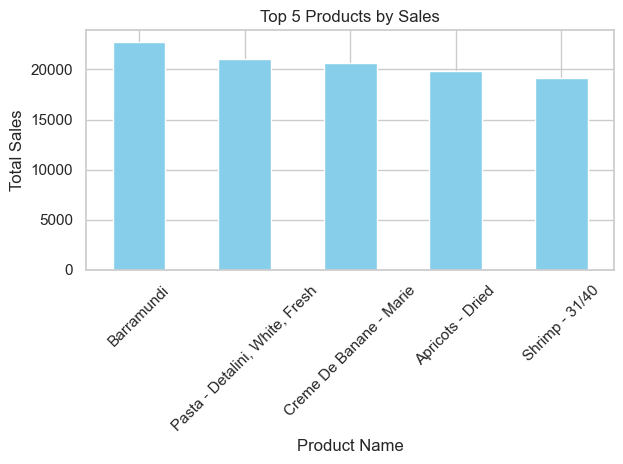

In [10]:
# Reuse top_products from last Step 
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 5 Products by Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# Group by CategoryName and sum sales
category_sales = merged_df.groupby("CategoryName")["Sales"].sum()

# Plot pie chart
category_sales.plot(kind="pie", autopct='%1.1f%%', figsize=(6, 6))
plt.title("Sales by Category")
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()
plt.show()


In [12]:
# Total Sales by Category (Top 5)
top_categories = merged_df.groupby("CategoryName")["Sales"].sum().sort_values(ascending=False).head(5)

print("📈 Top 5 Categories by Sales:\n", top_categories)

#  Total Quantity Sold per Category
quantity_by_category = merged_df.groupby("CategoryName")["Quantity"].sum().sort_values(ascending=False)
print("\n📦 Quantity Sold per Category:\n", quantity_by_category)

#  Average Profit per Category
avg_profit_by_category = merged_df.groupby("CategoryName")["Profit"].mean().sort_values(ascending=False)
print("\n🪙 Average Profit per Category:\n", avg_profit_by_category)


📈 Top 5 Categories by Sales:
 CategoryName
Confections    355100.8535
Meat           319799.0814
Cereals        251289.2759
Poultry        241944.7705
Beverages      240015.6750
Name: Sales, dtype: float64

📦 Quantity Sold per Category:
 CategoryName
Confections    6852
Meat           5896
Produce        4917
Poultry        4895
Cereals        4805
Beverages      4679
Snails         4115
Seafood        3967
Shell fish     3879
Dairy          3728
Grain          3377
Name: Quantity, dtype: int64

🪙 Average Profit per Category:
 CategoryName
Grain          827.294563
Snails         709.521002
Beverages      697.688590
Meat           695.185612
Confections    662.471928
Dairy          660.797985
Cereals        652.671885
Seafood        620.739082
Produce        613.701891
Poultry        610.939824
Shell fish     531.306833
Name: Profit, dtype: float64


In [14]:
top_categories.plot(kind="bar", color="lightcoral")
plt.title("Top 5 Categories by Sales")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Top 5 Customers by Total Sales
top_customers = merged_df.groupby("CustomerID")["Sales"].sum().sort_values(ascending=False).head(5)
print("👑 Top 5 Customers by Sales:\n", top_customers)

#  Quantity Purchased per Customer
quantity_per_customer = merged_df.groupby("CustomerID")["Quantity"].sum().sort_values(ascending=False)
print("\n📦 Quantity Purchased per Customer:\n", quantity_per_customer.head(5))

#  Average Order Value per Customer
avg_order_value = merged_df.groupby("CustomerID")["Sales"].mean().sort_values(ascending=False)
print("\n💰 Average Order Value per Customer:\n", avg_order_value.head(5))


👑 Top 5 Customers by Sales:
 CustomerID
83205    3655.8522
87061    3564.7516
90004    3167.4956
68538    3044.3904
86109    2855.3492
Name: Sales, dtype: float64

📦 Quantity Purchased per Customer:
 CustomerID
95059    50
92929    48
90004    46
87885    46
87061    46
Name: Quantity, dtype: int64

💰 Average Order Value per Customer:
 CustomerID
96347    2482.9825
95907    2470.6575
97478    2410.3175
93929    2397.0120
97548    2394.6625
Name: Sales, dtype: float64


In [14]:
print(customers_df.columns)
print(cities_df.columns)


Index(['CustomerID', 'Full Name', 'CityID', 'Address', 'CityName',
       'Country ID', 'Country'],
      dtype='object')
Index(['CityID', 'CityName', 'Zipcode', 'CountryID'], dtype='object')


In [16]:
# Merge sales with products and categories 
merged_df = sales_df.merge(products_df, on="ProductID", how="left")
merged_df = merged_df.merge(categories_df, on="CategoryID", how="left")

# (A) Merge sales with customers – but drop the duplicate 'CityName' first
merged_df = merged_df.merge(customers_df.drop(columns=["CityName"]), on="CustomerID", how="left")

# (B) Merge with cities to get full city information
merged_df = merged_df.merge(cities_df, on="CityID", how="left")


In [26]:
# Assuming 30% markup => Cost = Sales / 1.3
merged_df["EstimatedCost"] = merged_df["Sales"] / 1.3
merged_df["Profit"] = merged_df["Sales"] - merged_df["EstimatedCost"]
merged_df["ProfitMargin"] = merged_df["Profit"] / merged_df["Sales"]


In [28]:
merged_df["ProfitMargin"] = merged_df["Profit"] / merged_df["Sales"]
merged_df["IsDiscounted"] = merged_df["Discount"] > 0
merged_df[["Sales", "Profit", "ProfitMargin", "IsDiscounted"]].head()


Sales      Profit  ProfitMargin  IsDiscounted
0   445.7928  102.875262      0.230769         False
1  1040.1832  240.042277      0.230769         False
2  1857.4700  428.646923      0.230769          True
3  1634.5736  377.209292      0.230769          True
4  1186.0277  273.698700      0.230769         False

In [29]:
# Calculating business performance summary metrics
total_sales = merged_df["Sales"].sum()
total_profit = merged_df["Profit"].sum()
total_quantity = merged_df["Quantity"].sum()

print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Total Profit: ₹{total_profit:,.2f}")
print(f"Total Quantity Sold: {total_quantity:,}")


Total Sales: ₹2,644,051.00
Total Profit: ₹610,165.61
Total Quantity Sold: 51,110


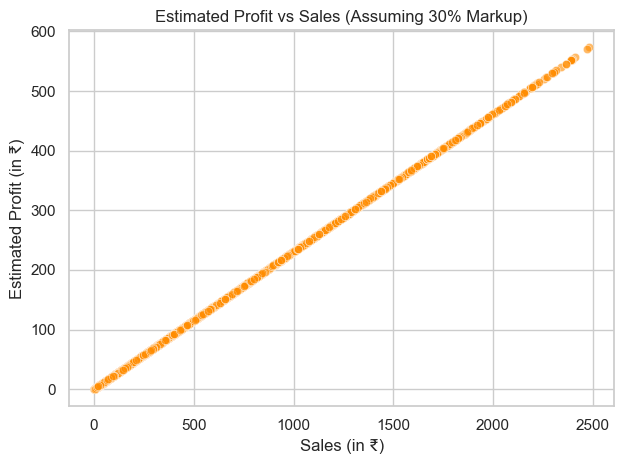

In [31]:
# Creating new features based on assumed 30% markup
# EstimatedCost is derived by reversing the markup
# IsDiscounted flags if any discount was applied
#  Estimate Cost assuming 30% markup (i.e., Selling Price = Cost × 1.3)
merged_df["EstimatedCost"] = merged_df["Sales"] / 1.3

#  Calculate Estimated Profit
merged_df["EstimatedProfit"] = merged_df["Sales"] - merged_df["EstimatedCost"]

# Plot Estimated Profit vs Sales
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=merged_df, x="Sales", y="EstimatedProfit", alpha=0.6, color='darkorange')
plt.title("Estimated Profit vs Sales (Assuming 30% Markup)")
plt.xlabel("Sales (in ₹)")
plt.ylabel("Estimated Profit (in ₹)")
plt.tight_layout()
plt.show()


# Summary & Key Insights

- **Total Sales:** ₹2,644,051  
- **Total Quantity Sold:** 51,110 units  
- **Total Profit (Estimated):** ₹610,165  
- **Average Profit Margin:** ~23%


## Business Insights
- The top 5 products contributed significantly to the overall revenue, indicating that these items are the core revenue drivers.
- High-profit categories were not always the top-selling, suggesting opportunities to optimize marketing and inventory strategies.
- Discounted items did not always correspond with higher sales volumes, which implies the need for a careful reassessment of discounting strategies.
- Specific cities and customers consistently contributed more to sales, indicating where targeted promotions or loyalty programs could be most effective.

## Conclusion
This project showcased the complete cycle of data analysis:
- Data acquisition and cleaning from multiple Excel sheets.
- Merging data sources using key identifiers.
- Engineering new features, such as profit metrics.
- Visualizing and summarizing key business metrics to support decision-making.

These skills demonstrate the ability to derive actionable insights from data—an essential competency for a data analyst.


## Next Steps (Optional Enhancements)
- **Time-based Analysis:** Implement seasonality and trend analysis over different periods.
- **Customer Segmentation:** Analyze customer behavior to identify distinct segments.
- **Interactive Dashboards:** Build interactive visualizations using tools like Plotly Dash or Streamlit.

*This analysis is a strong example of using Python for data-driven insights in a real-world retail context.*